<a href="https://colab.research.google.com/github/Abinayak03/Machine_learning/blob/main/XGBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset comprises the following columns:

- `ph:` The pH level of the milk.
- `temperature:` The temperature of the milk.
- `taste:` Whether the taste is good or bad (1 for good, 0 for bad).
- `odor:` Whether the odor is good or bad (1 for good, 0 for bad).
- `fat:` Whether the fat content is optimal or not (1 for optimal, 0 for not).
- `turbidity:` Whether the turbidity is high or low (1 for high, 0 for low).
- `colour:` The color value of the milk.
- `grade:` The quality of the milk (low, medium, high).
  
To build and evaluate machine learning models to predict the grade of the milk based on the given parameters. I Performed data preprocessing, exploratory data analysis, and model training using different algorithms, including logistic regression, decision tree, gradient boosting, and XGBoost.

**Dataset credits:** shrijayan (https://www.kaggle.com/datasets/cpluzshrijayan/milkquality/data)

**Import Necessary Libraries**

In [7]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
import time

### Data Preparation and Exploration


In [9]:
# Import the data from the "milk_quality_data.csv" file and store it in a variable 'df'
df=pd.read_csv('milk_quality_data.csv')

# Display the number of rows and columns in the dataset
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

# Display the first few rows of the dataset to get an overview
df.head()

Number of rows: 1059
Number of columns: 8


,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [10]:
# Check for any missing values in the dataset and handle them appropriately
df.isnull().sum()

,0
ph,0
temperature,0
taste,0
odor,0
fat,0
turbidity,0
colour,0
grade,0


In [11]:
# Encode the target variable 'grade' by mapping it to numbers ('low' = 0, 'medium' = 1, 'high' = 2)
df['grade']=df['grade'].map({'low':0,'medium':1,'high':2})
df.head()

,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


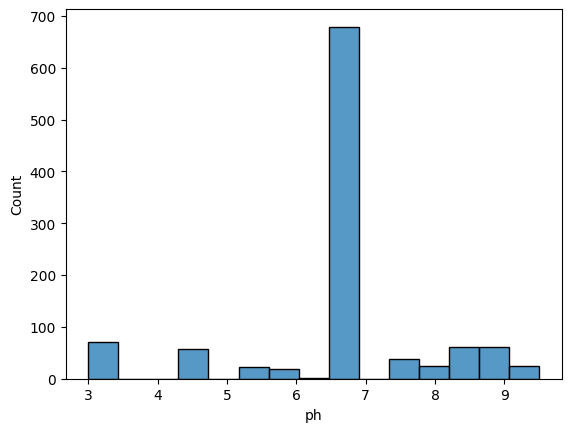

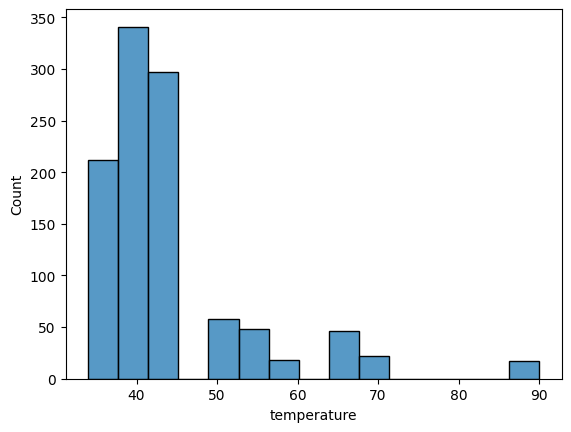

In [21]:
# Visualize the distribution of key features ('ph', 'temperature') using histograms
sns.histplot(df['ph'],bins=15)
plt.show()
sns.histplot(df['temperature'],bins=15)
plt.show()


### Model Training Using Basic Models



In [22]:
# Select the features and target variable for modeling
X=df.drop('grade',axis=1)
y=df['grade']

# Split the data into training and test sets with a test size of 30%
# import library
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [43]:
# Initialize and train a Logistic Regression model using the training data
# import library
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
'''
used scaling and increased iterations in a pipeline
to ensure the logistic regression model converges effectively by normalizing feature ranges
and allowing more optimization steps.
'''
start=time.time()
log_reg=make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000))
log_reg.fit(X_train,y_train)
end=time.time()
print(f'Time taken to train the model: {end-start} seconds')

# Print the model's accuracy score on test data.
y_pred=log_reg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_log_reg=accuracy_score(y_test,y_pred)
print("Accuracy of logistic regression model: {:.4f}".format(accuracy_log_reg))

Time taken to train the model: 0.04198455810546875 seconds
Accuracy of logistic regression model: 0.8491


In [42]:
# Initialize and train a Decision Tree Classifier using the training data
from sklearn.tree import DecisionTreeClassifier
start=time.time()
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
end=time.time()

# Print the model's accuracy score on test data.
accuracy_dt_clf=accuracy_score(y_test,dt_clf.predict(X_test))
print(f"Accuracy of decision tree classifier model: {accuracy_dt_clf:.4f}")
print(f'Time taken to train the model: {end-start} seconds')

Accuracy of decision tree classifier model: 0.9937
Time taken to train the model: 0.01280069351196289 seconds


### Model Training Using Advanced Models


In [41]:
# Initialize and train a Gradient Boosting Classifier with 50 estimators using the training data
from sklearn.ensemble import GradientBoostingClassifier
start=time.time()
gb_clf=GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_train,y_train)
end=time.time()

# Print the model's accuracy score
accuracy_gb_clf=accuracy_score(y_test,gb_clf.predict(X_test))
print("Accuracy of gradient boosting classifier model: {:.4f} ".format(accuracy_gb_clf))
print(f'Time taken to train the model: {end-start} seconds')

Accuracy of gradient boosting classifier model: 0.9906 
Time taken to train the model: 0.7515444755554199 seconds


In [45]:
#Initialize and train an XGBoost Classifier with 50 estimators using the training data
from xgboost import XGBClassifier
start=time.time()
xgb_clf=XGBClassifier(n_estimators=50)
xgb_clf.fit(X_train,y_train)
end=time.time()

# Print the model's accuracy score
accuracy_xgb_clf=accuracy_score(y_test,xgb_clf.predict(X_test))
print("Accuracy of xgboost classifier model: {:.4f} ".format(accuracy_xgb_clf))
print(f'Time taken to train the model: {end-start} seconds')

Accuracy of xgboost classifier model: 0.9969 
Time taken to train the model: 0.1353321075439453 seconds


In [48]:
report=classification_report(y_test,xgb_clf.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       0.99      1.00      1.00       127
           2       1.00      0.99      0.99        76

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



### Task 4: Experiment with Hyperparameters in XGBoost

    - n_estimators=100
    - max_depth=5
    - learning_rate=0.1
    - colsample_bytree=0.5.

Learn about these parameters here: [XgboostClassifier Parameters](https://xgboost.readthedocs.io/en/stable/parameter.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------

In [46]:
#Train the XGBoost model with n_estimators=100, max_depth=5, learning_rate=0.1, colsample_bytree=0.5
start=time.time()
xg=XGBClassifier(n_estimators=100,max_depth=5,learning_rate=0.1,colsample_bytree=0.5)
xg.fit(X_train,y_train)
end=time.time()

#Evaluate the model's performance using accuracy score and print it
y_pred_xg=xg.predict(X_test)
accuracy_xg=accuracy_score(y_test,y_pred_xg)

print(f'accuracy score: {accuracy_xg:.4f}')
print(f'Time taken to train the model: {end-start} seconds')

accuracy score: 0.9969
Time taken to train the model: 1.5425822734832764 seconds


In [47]:
#Print the classification report and confusion matrix for the model
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_xg))
print(confusion_matrix(y_test,y_pred_xg))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       1.00      1.00      1.00       127
           2       0.99      1.00      0.99        76

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

[[114   0   1]
 [  0 127   0]
 [  0   0  76]]
